# *Importando Bibliotecas*

In [1]:
import random
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# **Problema 1**

#*Importanto os dados*

In [2]:
# Cria uma lista com os nomes das colunas
cols = ["lat", "lon"]
# Imprime a lista
len(cols)

2

In [3]:
path = 'https://raw.githubusercontent.com/Alisson-Ursulino-git/Machine_Learning/main/Dados_das_Listas/Lista_06/quake.csv'
DataFrame = pd.read_csv(path, names=cols)
DataFrame

,lat,lon
0,-52.26,28.30
1,45.53,150.93
2,41.85,142.78
3,29.19,141.15
4,-21.66,169.81
...,...,...
2173,51.54,-173.11
2174,-10.16,161.01
2175,27.87,139.51
2176,36.43,140.98


#Análise dos Dados

In [4]:
print(DataFrame.info(), '\n ------------- \n Null count: \n', DataFrame.isnull().sum() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     2178 non-null   float64
 1   lon     2178 non-null   float64
dtypes: float64(2)
memory usage: 34.2 KB
None 
 ------------- 
 Null count: 
 lat    0
lon    0
dtype: int64


In [5]:
DataFrame.describe()

,lat,lon
count,2178.000000,2178.000000
mean,7.961997,54.914835
std,30.545583,118.875581
min,-66.490000,-179.960000
25%,-12.432500,-67.782500
50%,0.210000,122.100000
75%,36.480000,146.860000
max,78.150000,180.000000


#*Modelagem*

In [6]:
# Define uma função que calcula a distância euclidiana entre dois pontos
def euclidean_distance(x, y):
  # Obtém o vetor de diferenças entre os pontos
  diff = x - y
  # Calcula a distância euclidiana usando a fórmula
  dist = np.sqrt(np.dot(diff, diff))
  # Retorna a distância euclidiana
  return dist


In [7]:
# Define uma função que calcula a distância de Mahalanobis entre dois pontos
def mahalanobis_distance(x, y):
  # Obtém a matriz de covariância dos dados
  cov = np.cov(data.T)
  # Obtém o vetor de diferenças entre os pontos
  diff = x - y
  # Resolve o sistema Ax = b para x usando np.linalg.solve
  x = np.linalg.solve(cov, diff)
  # Calcula a distância de Mahalanobis usando a fórmula
  dist = np.sqrt(np.dot(diff, x))

  # Retorna a distância de Mahalanobis
  return dist

In [8]:

# Define uma função que recebe os dados, o número de clusters K, o número máximo de iterações max_iter e a função de distância
def lloyd_algorithm(data, K, max_iter, distance_function):
  # Converte os dados em um array numpy
  data = data.to_numpy()
  # Obtém o número de pontos de dados e a dimensão dos dados
  N, D = data.shape
  # Inicializa os centróides de forma aleatória, escolhendo K pontos dos dados
  centroids = data[np.random.choice(N, K, replace=False)]
  # Inicializa uma variável para armazenar os clusters
  clusters = np.zeros(N)
  # Inicializa uma variável para armazenar o erro de quantização
  error = 0
  # Inicializa uma variável para controlar a convergência
  converged = False
  # Define um limiar para a variação dos centróides ou do erro
  threshold = 1e-6
  # Repete até max_iter vezes ou até convergir
  for i in range(max_iter):
    # Calcula a distância entre cada ponto de dados e cada centróide usando a função de distância
    distances = np.array([[distance_function(x, y) for y in centroids] for x in data])
    # Atribui cada ponto de dados ao cluster que tem o centróide mais próximo
    clusters = np.argmin(distances, axis=1)
    # Recalcula os centróides como a média dos pontos de cada cluster
    new_centroids = np.array([data[clusters == k].mean(axis=0) for k in range(K)])
    # Calcula o novo erro de quantização como a soma das distâncias quadradas entre cada ponto e seu centróide
    new_error = np.sum(np.min(distances, axis=1) ** 2)
    # Verifica se os centróides ou o erro mudaram significativamente
    if np.allclose(centroids, new_centroids, atol=threshold) or np.isclose(error, new_error, atol=threshold):
      # Se sim, marca como convergido e sai do loop
      converged = True
      break
    else:
      # Se não, atualiza os centróides e o erro e continua o loop
      centroids = new_centroids
      error = new_error
  # Retorna os centróides e os clusters como resultado do algoritmo
  return centroids, clusters



In [9]:
#centroids, clusters = lloyd_algorithm(df, K=2, max_iter=10, distance_function=euclidean_distance)

# *Índice DB*

In [10]:
# Define uma função que calcula o índice DB
def db_index(data, centroids, clusters):
  # Obtém o número de clusters K
  K = len(centroids)
  # Inicializa uma lista para armazenar os valores de dispersão intra-cluster
  deltas = []
  # Para cada cluster k
  for k in range(K):
    # Obtém os pontos que pertencem ao cluster k
    points = data[clusters == k]
    # Calcula a dispersão intra-cluster como a média das distâncias entre os pontos e o centróide
    delta = np.mean(np.linalg.norm(points - centroids[k], axis=1))
    # Adiciona o valor de delta à lista
    deltas.append(delta)
  # Inicializa uma variável para armazenar o valor do índice DB
  db = 0
  # Para cada cluster k
  for k in range(K):
    # Inicializa uma variável para armazenar o valor máximo do termo Rkk'
    max_r = 0
    # Para cada cluster k' diferente de k
    for k_prime in range(K):
      if k_prime != k:
        # Calcula a distância entre os centróides de k e k'
        delta_kk = np.linalg.norm(centroids[k] - centroids[k_prime])
        # Calcula o termo Rkk' como a soma das dispersões intra-cluster dividida pela distância entre os centróides
        r = (deltas[k] + deltas[k_prime]) / delta_kk
        # Atualiza o valor máximo de Rkk' se necessário
        if r > max_r:
          max_r = r
    # Adiciona o valor máximo de Rkk' ao índice DB
    db += max_r
  # Divide o índice DB pelo número de clusters K
  db /= K
  # Retorna o índice DB
  return db


Normalização dos dados

In [11]:
df = DataFrame.copy()
# Divide os dados em treino e teste
X_train, X_test = train_test_split(df[['lat', 'lon']],test_size=0.2, random_state=42)
# Normaliza os dados de treino e teste
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
data_train = pd.DataFrame(X_train_scaled)
data_test  = pd.DataFrame(X_test_scaled)

Aplicando o Índice DB

In [12]:
number_iter = 100
# Tranforma os dados de treino em DataFrame pois a função lloyd_algorithm recebe um df
dataframe_train_scaled = pd.DataFrame(data_train)
# Define uma lista de valores possíveis para K
K_values = list(range(4, 12))
# Define uma variável para armazenar o menor valor de DB
min_DB = np.inf
# Para cada valor de K na lista
i=0
for K in K_values:

  print(f'K: {K} de {K_values[-1]}')
  print(f'min_Db: {min_DB}\n')
  # Define uma variável para armazenar o menor erro de quantização
  min_error = np.inf
  # Define uma variável para armazenar os melhores centróides e clusters para esse valor de K
  best_centroids_K = None
  best_clusters_K = None
  # Repete múltiplas vezes a execução do algoritmo de Lloyd, usando a função de distância desejada
  for _ in range(20):
    # Obtém os centróides e os clusters retornados pela função lloyd_algorithm com os dados de treino normalizados
    centroids, clusters = lloyd_algorithm(dataframe_train_scaled, K, max_iter=number_iter,
                                          distance_function=euclidean_distance)
    # Calcula o erro de quantização como a soma das distâncias quadradas entre cada ponto e seu centróide
    error = np.sum(np.min(np.array([[euclidean_distance(x, y) for y in centroids] for x in dataframe_train_scaled]), axis=1) ** 2)
    # Se o erro de quantização for menor que o menor erro de quantização até então:
    if error < min_error:
      # Atualiza o menor erro de quantização com o valor atual
      min_error = error
      # Atualiza os melhores centróides e clusters para esse valor de K com os valores atuais
      best_centroids_K = centroids
      best_clusters_K = clusters
  # Calcula o índice DB usando a função db_index e os melhores centróides e clusters para esse valor de K com os dados de treino normalizados
  db = db_index(dataframe_train_scaled, best_centroids_K, best_clusters_K)
  # Se o índice DB for menor que o menor índice DB até então:
  if db < min_DB:
    # Atualiza o menor índice DB com o valor atual
    min_DB = db
    # Atualiza o melhor valor de K com o valor atual
    best_K = K
    # Atualiza os melhores centróides e clusters com os melhores centróides e clusters para esse valor de K
    best_centroids = best_centroids_K
    best_clusters = best_clusters_K


K: 4 de 11
min_Db: inf

K: 5 de 11
min_Db: 0.8463686245273125

K: 6 de 11
min_Db: 0.750898429264538

K: 7 de 11
min_Db: 0.6007995154143569

K: 8 de 11
min_Db: 0.6007995154143569

K: 9 de 11
min_Db: 0.6007995154143569

K: 10 de 11
min_Db: 0.6007995154143569

K: 11 de 11
min_Db: 0.6007995154143569



In [13]:
# Obter os clusters para os dados de teste normalizados com os melhores centróides encontrados
clusters_test = np.argmin(np.array([[euclidean_distance(x, y) for y in best_centroids] for x in X_test_scaled]), axis=1)
# Desnormalizar os dados de teste e os melhores centróides usando a função inverse_transform do scaler
data_test_original = scaler.inverse_transform(data_test)
best_centroids_original = scaler.inverse_transform(best_centroids)

***Gráfico***

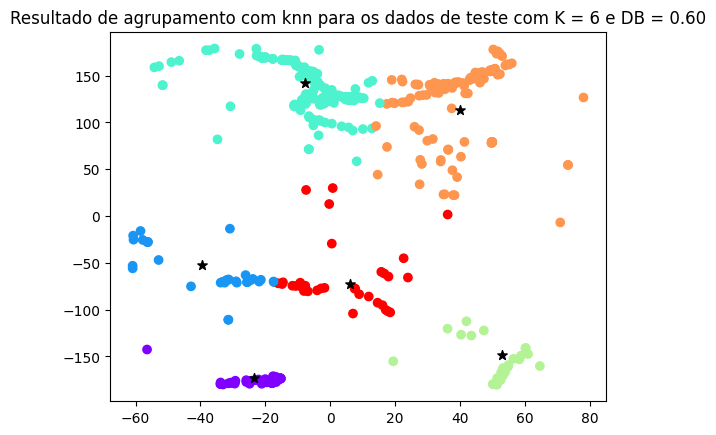

In [14]:
# Plotar os resultados para os dados de teste desnormalizados
plt.scatter(data_test_original[:, 0], data_test_original[:, 1], c=clusters_test, cmap='rainbow')
plt.scatter(best_centroids_original[:, 0], best_centroids_original[:, 1], marker='*', s=50, c='black')
plt.title(f'Resultado de agrupamento com knn para os dados de teste com K = {best_K} e DB = {min_DB:.2f}')
plt.show()


# **Problema 2**

#*Importanto os dados*

In [15]:
# Cria uma lista com os nomes das colunas
cols = [f'X{i}' for i in range(1,5)] + ['Y']
# Imprime a lista
cols

['X1', 'X2', 'X3', 'X4', 'Y']

In [16]:
path = 'https://raw.githubusercontent.com/Alisson-Ursulino-git/Machine_Learning/main/Dados_das_Listas/Lista_06/penguins.csv'
DataFrame = pd.read_csv(path, names=cols)
DataFrame

,X1,X2,X3,X4,Y
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,0.0
2,40.3,18.0,195.0,3250.0,0.0
3,36.7,19.3,193.0,3450.0,0.0
4,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...
328,55.8,19.8,207.0,4000.0,1.0
329,43.5,18.1,202.0,3400.0,1.0
330,49.6,18.2,193.0,3775.0,1.0
331,50.8,19.0,210.0,4100.0,1.0


#Análise dos Dados

In [17]:
print(DataFrame.info(), '\n ------------- \n Null count: \n', DataFrame.isnull().sum() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      333 non-null    float64
 1   X2      333 non-null    float64
 2   X3      333 non-null    float64
 3   X4      333 non-null    float64
 4   Y       333 non-null    float64
dtypes: float64(5)
memory usage: 13.1 KB
None 
 ------------- 
 Null count: 
 X1    0
X2    0
X3    0
X4    0
Y     0
dtype: int64


In [18]:
DataFrame.describe()

,X1,X2,X3,X4,Y
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,0.918919
std,5.468668,1.969235,14.015765,805.215802,0.889718
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.500000,17.300000,197.000000,4050.000000,1.000000
75%,48.600000,18.700000,213.000000,4775.000000,2.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


In [19]:
DataFrame

,X1,X2,X3,X4,Y
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,0.0
2,40.3,18.0,195.0,3250.0,0.0
3,36.7,19.3,193.0,3450.0,0.0
4,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...
328,55.8,19.8,207.0,4000.0,1.0
329,43.5,18.1,202.0,3400.0,1.0
330,49.6,18.2,193.0,3775.0,1.0
331,50.8,19.0,210.0,4100.0,1.0


# Modelagem

# Normalização dos dados

In [20]:
df = DataFrame.copy()
df['Y'] = df['Y'].astype(int)
df['Y'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 333 entries, 0 to 332
Series name: Y
Non-Null Count  Dtype
--------------  -----
333 non-null    int64
dtypes: int64(1)
memory usage: 2.7 KB


In [21]:
df.iloc[:,:-1]

,X1,X2,X3,X4
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
328,55.8,19.8,207.0,4000.0
329,43.5,18.1,202.0,3400.0
330,49.6,18.2,193.0,3775.0
331,50.8,19.0,210.0,4100.0


In [22]:
# Extrai os dados dos atributos
X = df.iloc[:,:-1]
# Normaliza os dados dos atributos
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

# Cria um um novo Data Frame Normalizado
df_scaled = pd.DataFrame(X_scaled, columns = cols[:-1])
df_scaled['Y'] = df['Y']
df_scaled

,X1,X2,X3,X4,Y
0,-0.490909,0.333333,-0.694915,-0.416667,0
1,-0.461818,0.023810,-0.525424,-0.388889,0
2,-0.403636,0.166667,-0.220339,-0.694444,0
3,-0.665455,0.476190,-0.288136,-0.583333,0
4,-0.476364,0.785714,-0.389831,-0.472222,0
...,...,...,...,...,...
328,0.723636,0.595238,0.186441,-0.277778,1
329,-0.170909,0.190476,0.016949,-0.611111,1
330,0.272727,0.214286,-0.288136,-0.402778,1
331,0.360000,0.404762,0.288136,-0.222222,1


# PCA

In [23]:
import numpy as np

# Cria uma função PCA
def my_pca(data, n_components):
    # Separa os dados das classes
    X = data[:, :-1]
    y = data[:, -1]

    # Centraliza os dados
    X_centered = X - np.mean(X, axis=0)

    # Calcula a matriz de covariância
    cov_matrix = np.cov(X_centered.T)

    # Calcula os autovalores e autovetores da matriz de covariância
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Ordena os autovalores em ordem decrescente e selecionar os n_components maiores
    idx = eigenvalues.argsort()[::-1][:n_components]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Projeta os dados na base dos componentes principais
    X_projected = np.dot(X_centered, eigenvectors)

    # Calcula a variância explicada
    explained_variance = np.sum(eigenvalues) / np.sum(np.linalg.eigvals(cov_matrix))

    return X_projected, y, explained_variance



In [24]:
df_scaled.values

array([[-0.49090909,  0.33333333, -0.69491525, -0.41666667,  0.        ],
       [-0.46181818,  0.02380952, -0.52542373, -0.38888889,  0.        ],
       [-0.40363636,  0.16666667, -0.22033898, -0.69444444,  0.        ],
       ...,
       [ 0.27272727,  0.21428571, -0.28813559, -0.40277778,  1.        ],
       [ 0.36      ,  0.4047619 ,  0.28813559, -0.22222222,  1.        ],
       [ 0.31636364,  0.33333333, -0.11864407, -0.40277778,  1.        ]])

In [25]:
X_projected, y, explained_variance = my_pca(df_scaled.values, n_components=2)

print('Projeção dos dados em 2 dimensões:')
print(X_projected)


# Calcular a proporção de variância explicada para diferentes números de componentes principais
n_components = range(1, 5)
explained_variances = []
for n in n_components:
    _, _, explained_variance = my_pca(df_scaled.values, n_components=n)
    print(f'Variância explicada com {n} componentes principais: {explained_variance}')
    explained_variances.append(explained_variance)

Projeção dos dados em 2 dimensões:
[[-8.44226105e-01 -6.32579356e-04]
 [-5.79695740e-01  2.18121835e-01]
 [-6.00554572e-01  9.70976381e-02]
 [-8.14964957e-01 -3.99083088e-02]
 [-8.80529761e-01 -4.04599683e-01]
 [-7.93939730e-01  1.98093916e-01]
 [-3.65966910e-01 -3.31564324e-01]
 [-8.20875319e-01  1.97816494e-01]
 [-8.96008746e-01 -5.16740293e-01]
 [-6.68845165e-01 -4.37328560e-01]
 [-7.51476572e-01  2.61590846e-01]
 [-6.87765707e-01 -6.23356281e-02]
 [-4.01693005e-01 -6.60178043e-01]
 [-1.00808436e+00  2.69087596e-01]
 [-5.41898576e-01 -9.05763260e-01]
 [-1.08870344e+00  1.89448671e-01]
 [-9.48536108e-01  7.13012457e-02]
 [-8.03246410e-01 -1.38469856e-02]
 [-6.63305950e-01  1.15703608e-01]
 [-7.02036594e-01  3.05037037e-01]
 [-8.29795035e-01  7.48943172e-02]
 [-8.11978607e-01 -2.23617979e-02]
 [-7.65138421e-01  1.43181117e-01]
 [-1.23410034e+00  1.60503848e-01]
 [-7.86916117e-01 -1.10366241e-01]
 [-8.38599278e-01  4.44091798e-01]
 [-8.50428440e-01  1.83237796e-01]
 [-7.31172561e-01  1

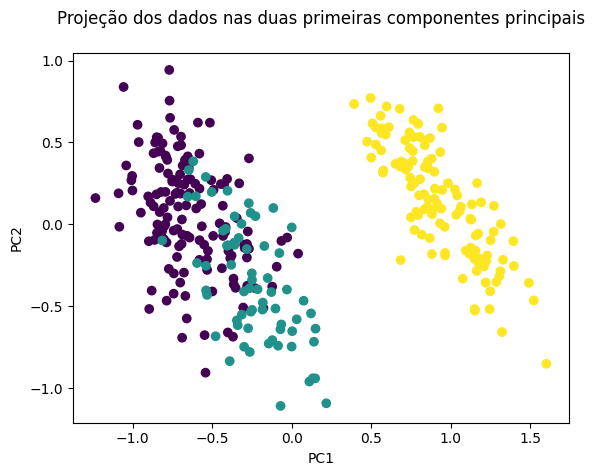

In [26]:
# Plotar a projeção dos dados nas duas primeiras componentes principais
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projeção dos dados nas duas primeiras componentes principais\n')
plt.show()

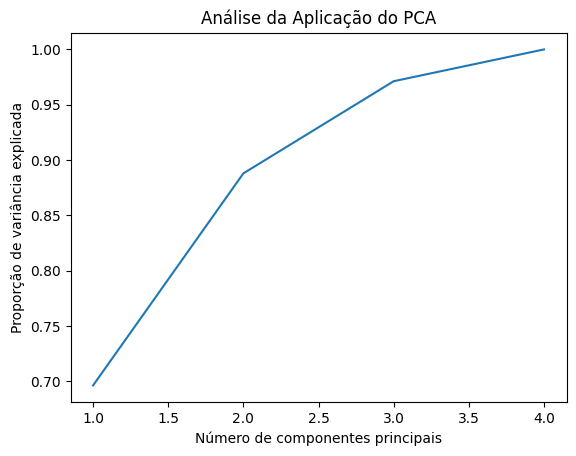

In [27]:
# Plotar a proporção de variância explicada em função do número de dimensões
plt.plot(n_components, explained_variances)
plt.xlabel('Número de componentes principais')
plt.ylabel('Proporção de variância explicada')
plt.title('Análise da Aplicação do PCA')
plt.show()